In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.animation as animation
from PIL import Image

# Load CSV file
filename = "Trial1Feb28.2(density = 0.4).csv"  # Replace with your actual filename
df = pd.read_csv(filename)

# Print the first few rows to check the structure
df.head()


,Timestep,Road Row,Pos 0,Pos 1,Pos 2,Pos 3,Pos 4,Pos 5,Pos 6,Pos 7,...,Pos 90,Pos 91,Pos 92,Pos 93,Pos 94,Pos 95,Pos 96,Pos 97,Pos 98,Pos 99
0,38,0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,38,1,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,38,3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,39,0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
timesteps = df["Timestep"].max() + 1  # Total timesteps
road_length = len(df.columns) - 2  # Exclude "Timestep" and "Road Row"
occupancy_matrix = np.zeros((timesteps, road_length))

for _, row in df.iterrows():
    timestep = int(row["Timestep"])  # Ensure integer index
    occupancy_matrix[timestep, :] = row.iloc[2:].values  # Extract road occupancy

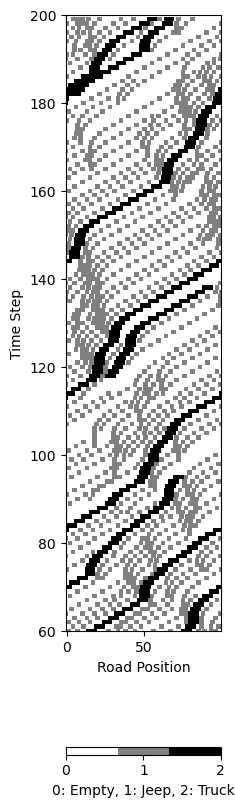

In [18]:
# Define a custom colormap
cmap = ListedColormap(["white", "gray", "black"])  # 0 → White, 1 → Gray, 2 → Black

plt.figure(figsize=(2, 10))
img = plt.imshow(occupancy_matrix, aspect="auto", cmap=cmap, interpolation="nearest")

# Add colorbar with adjusted position
cbar = plt.colorbar(img, orientation="horizontal", fraction=0.05, pad=0.15)
cbar.set_ticks([0, 1, 2])
cbar.set_label("0: Empty, 1: Jeep, 2: Truck")

plt.xlabel("Road Position")
plt.ylabel("Time Step")
plt.ylim(60, 200)#occupancy_matrix.shape[0])  # Ensures timestep 0 is at the top
#plt.title("Spatio-Temporal Road Occupancy")

plt.show()


Animation saved as road_occupancy_animation.gif


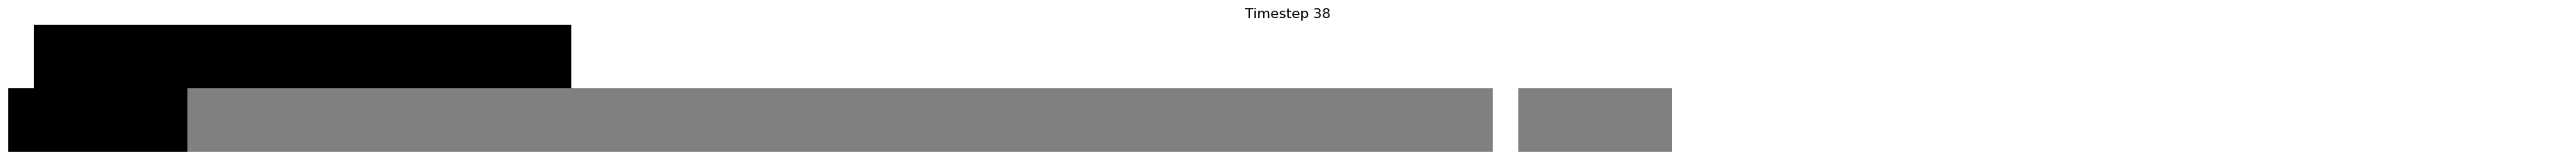

In [21]:
# Load CSV File
filename = "Trial1Feb28.2(density = 0.4).csv"  # Change to your actual file
df = pd.read_csv(filename)

# Extract unique timesteps
timesteps = df["Timestep"].unique()
road_width = df["Road Row"].nunique()  # Number of rows (lanes)
road_length = len(df.columns) - 2  # Exclude "Timestep" and "Road Row"

# Convert DataFrame to 3D NumPy Array (timesteps, width, length)
occupancy_data = np.zeros((len(timesteps), road_width, road_length))

for i, timestep in enumerate(timesteps):
    subset = df[df["Timestep"] == timestep].sort_values("Road Row")
    occupancy_data[i] = subset.iloc[:, 2:].values  # Extract road occupancy values

# Create figure and colormap
fig, ax = plt.subplots(figsize=(40, 2))
cmap = ListedColormap(["white", "gray", "black"])  # 0 → White, 1 → Gray, 2 → Black
img = ax.imshow(occupancy_data[0], cmap=cmap, aspect="auto", interpolation="nearest")

# Remove axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Update function for animation
def update(frame):
    img.set_array(occupancy_data[frame])  # Update data
    ax.set_title(f"Timestep {timesteps[frame]}")
    return [img]

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(timesteps), interval=150, blit=False)

# Save animation as GIF using pillow
output_filename = "road_occupancy_animation.gif"
ani.save(output_filename, writer="pillow", fps=20)

print(f"Animation saved as {output_filename}")
